# Image analysis using Fourier transforms

In [3]:
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image, ImageDraw

## 1. Fourier transform of a disc

https://www.geeksforgeeks.org/python-pil-imagedraw-draw-ellipse/

In [5]:
im1 = Image.new(mode="RGB", size=(300, 300))

draw = ImageDraw.Draw(im1)

draw.ellipse((100, 100, 200, 200), fill=(255, 0, 0), outline=(0, 0, 0))

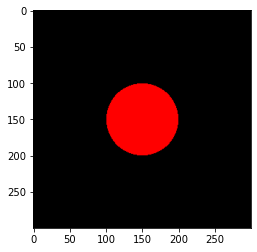

In [6]:
%matplotlib inline
plt.imshow(im1)

In [11]:
type(im1)

image_1 = np.array(im1)[:,:,0]//255

print(image_1.shape)

print(np.unique(image_1))

(300, 300)
[0 1]


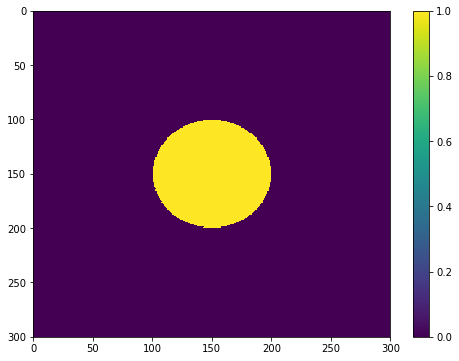

In [13]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(image_1, shading='auto', cmap = "viridis", vmin = 0, vmax=1)
plt.gca().invert_yaxis()
plt.colorbar(Z1)

plt.show()

## Fourier transform of the disc

In [17]:
fourier_1 = np.fft.fft2(image_1)

shifted_fourier_1 = np.fft.fftshift(fourier_1)

norm_fourier_1 = np.abs(shifted_fourier_1)

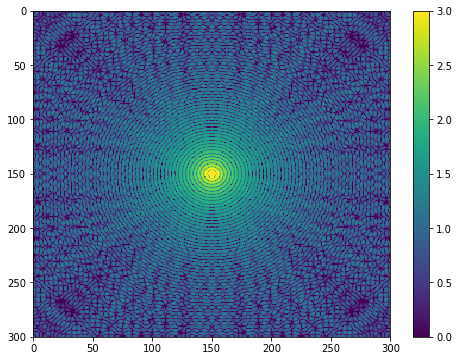

In [18]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(np.log10(norm_fourier_1), shading='auto', cmap = "viridis", vmin = 0, vmax=3)
plt.gca().invert_yaxis()
plt.colorbar(Z1)

plt.show()

## 2. Fourier transform of a block

https://www.geeksforgeeks.org/python-pil-imagedraw-draw-line/

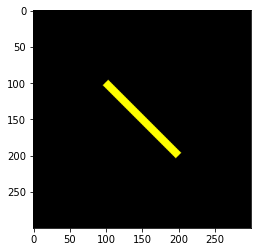

In [19]:
im2 = Image.new(mode="RGB",size=(300, 300))

draw = ImageDraw.Draw(im2)

draw.line((200, 200, 100, 100), fill=(255, 255, 0), width=10)

%matplotlib inline
plt.imshow(im2)

In [21]:
image_2 = np.array(im2)[:,:,0]//255

print(np.max(image_2))

print(np.min(image_2))

1
0


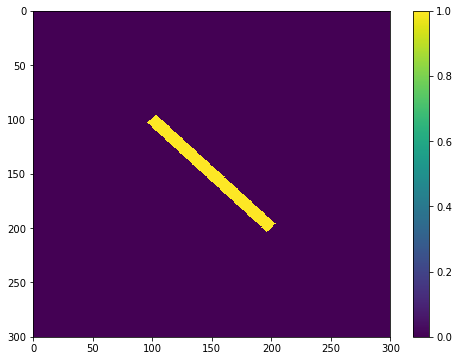

In [22]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(image_2, shading='auto', cmap = "viridis", vmin = 0, vmax=1)
plt.gca().invert_yaxis()
plt.colorbar(Z1)

plt.show()

In [24]:
fourier_2 = np.fft.fft2(image_2)

shifted_fourier_2 = np.fft.fftshift(fourier_2)

norm_fourier_2 = np.abs(shifted_fourier_2)

/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


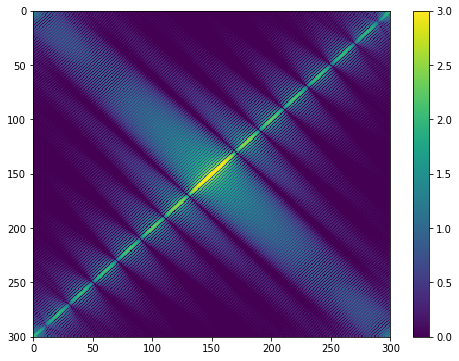

In [26]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(np.log10(norm_fourier_2), shading='auto', cmap = "viridis", vmin = 0, vmax=3)
plt.gca().invert_yaxis()
plt.colorbar(Z1)

plt.show()

## 3. Fourier transform of a Rubik's cube

In [41]:
import matplotlib.image as mpimg

In [42]:
# Read image:

img = mpimg.imread("./Rubiks_cube.jpg")

print(img.shape)

(1600, 1600, 3)


In [43]:
# 2D image:

image_3 = img[:,:,0]
print(image_3.shape)

(1600, 1600)


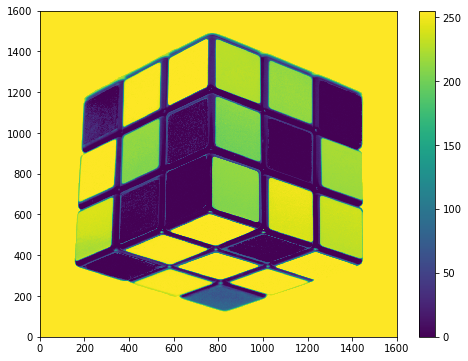

In [44]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(image_3, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

### Fourier transform:

In [45]:
fourier_3 = np.fft.fft2(image_3)

shifted_fourier_3 = np.fft.fftshift(fourier_3)

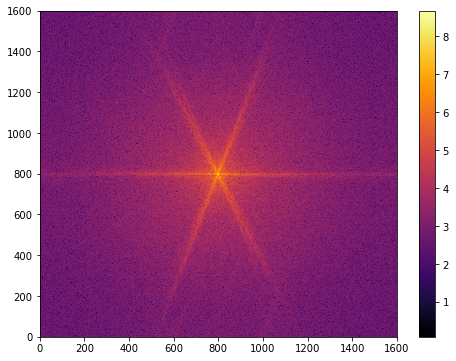

In [46]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(np.log10(np.abs(shifted_fourier_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Low-pass filter:

We need to construct a mask.

In [48]:
image_centre = [shifted_fourier_3.shape[0]//2, shifted_fourier_3.shape[1]//2]

print(image_centre)

radius_centre = 50 #pixels

[800, 800]


In [49]:
mask_1 = Image.new(mode="RGB", size=(1600, 1600))

draw = ImageDraw.Draw(mask_1)

draw.ellipse((image_centre[0]-radius_centre, image_centre[1]-radius_centre, image_centre[0]+radius_centre, image_centre[1]+radius_centre), fill=(255, 0, 0), outline=(0, 0, 0))

255 0


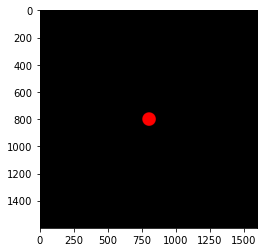

In [56]:
%matplotlib inline
plt.imshow(mask_1)

print(np.max(mask_1), np.min(mask_1))

In [57]:
mask_1 = np.array(mask_1)[:,:,0]//255

print(np.unique(mask_1))

[0 1]


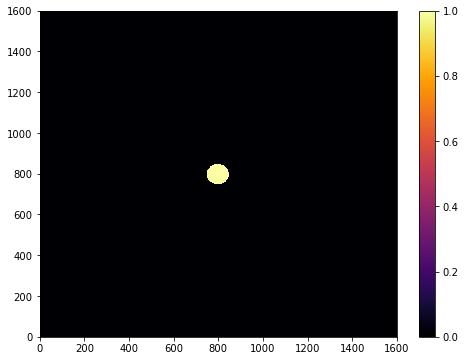

In [58]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(mask_1, shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Multiply the mask by the fourier image

In [59]:
masked_fourier_3 = shifted_fourier_3*mask_1

/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


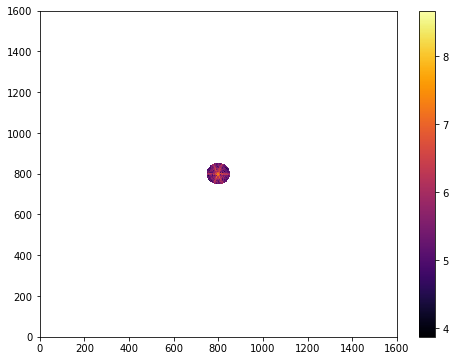

In [60]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Inverse Fourier transform of the masked Fourier |image

In [61]:
inv_filter_3 = np.fft.ifftshift(masked_fourier_3)
inv_filter_3 = np.fft.ifft2(inv_filter_3)

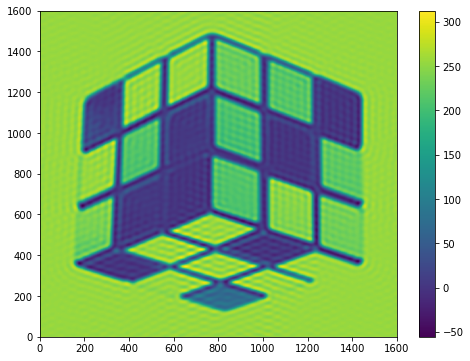

In [63]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(inv_filter_3.real, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

### HIgh pass filter:

Removes low frequency (large scale) structures.

In [64]:
mask_2 = - mask_1 + 1

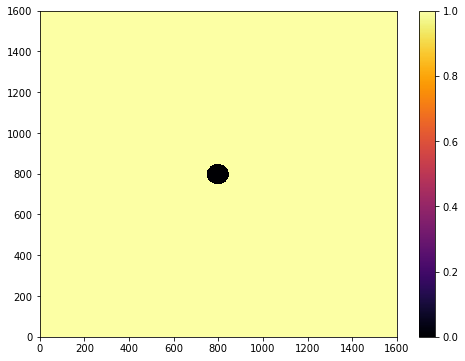

In [65]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(mask_2, shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Multiply mask 2 by the fourier image:

In [67]:
masked_fourier_3_2 = shifted_fourier_3*mask_2

/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


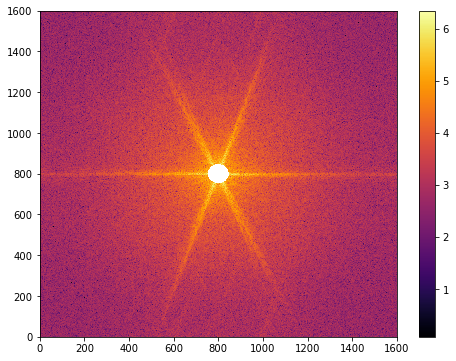

In [68]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(np.log10(np.abs(masked_fourier_3_2)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

In [70]:
inv_filter_3_2 = np.fft.ifftshift(masked_fourier_3_2)
inv_filter_3_2 = np.fft.ifft2(inv_filter_3_2)

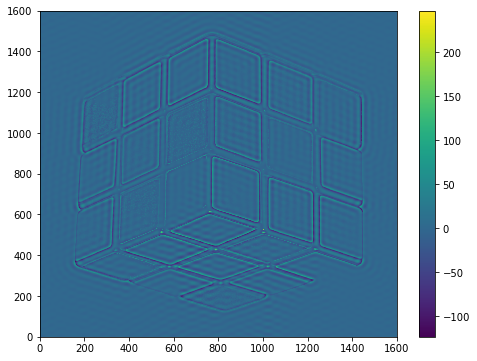

In [71]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(inv_filter_3_2.real, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

## 4. Fourier transform of 2D noise:

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

In [72]:
noise_array = np.random.randn(300, 300)

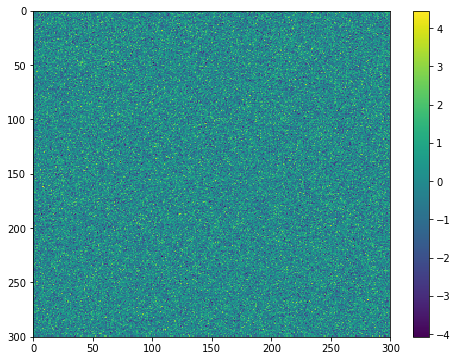

In [74]:
plt.figure(figsize = (8,6))
plt.gca().invert_yaxis()
Z1 = plt.pcolor(noise_array, shading='auto', cmap = "viridis")#, vmin = 0, vmax=3)

plt.colorbar(Z1)

plt.show()

In [75]:
fourier_4 = np.fft.fft2(noise_array)

shifted_fourier_4 = np.fft.fftshift(fourier_4)

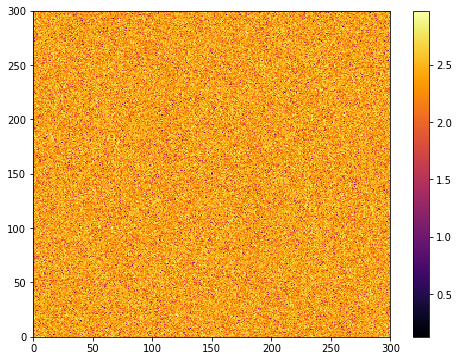

In [76]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(np.log10(np.abs(fourier_4)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()